# Part 00: Introduction to Prithvi, IBM-NASA Foundational Geospatial Model
Introduction and Installation

## Background

### What is Prithvi?

Parts of this Jupyter Notebook are derived from Prithvi's [documentation](https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M) web page available in Hugging Face: 

Prithvi is a Vision transformer pre-trained by IBM and NASA on contiguous US Harmonised Landsat Sentinel 2 (HLS) data. The model adopts a self-supervised encoder developed with a ViT architecture and Masked AutoEncoder (MAE) learning strategy, with an MSE loss function. The model includes spatial attention across multiple patches and also temporal attention for each patch.

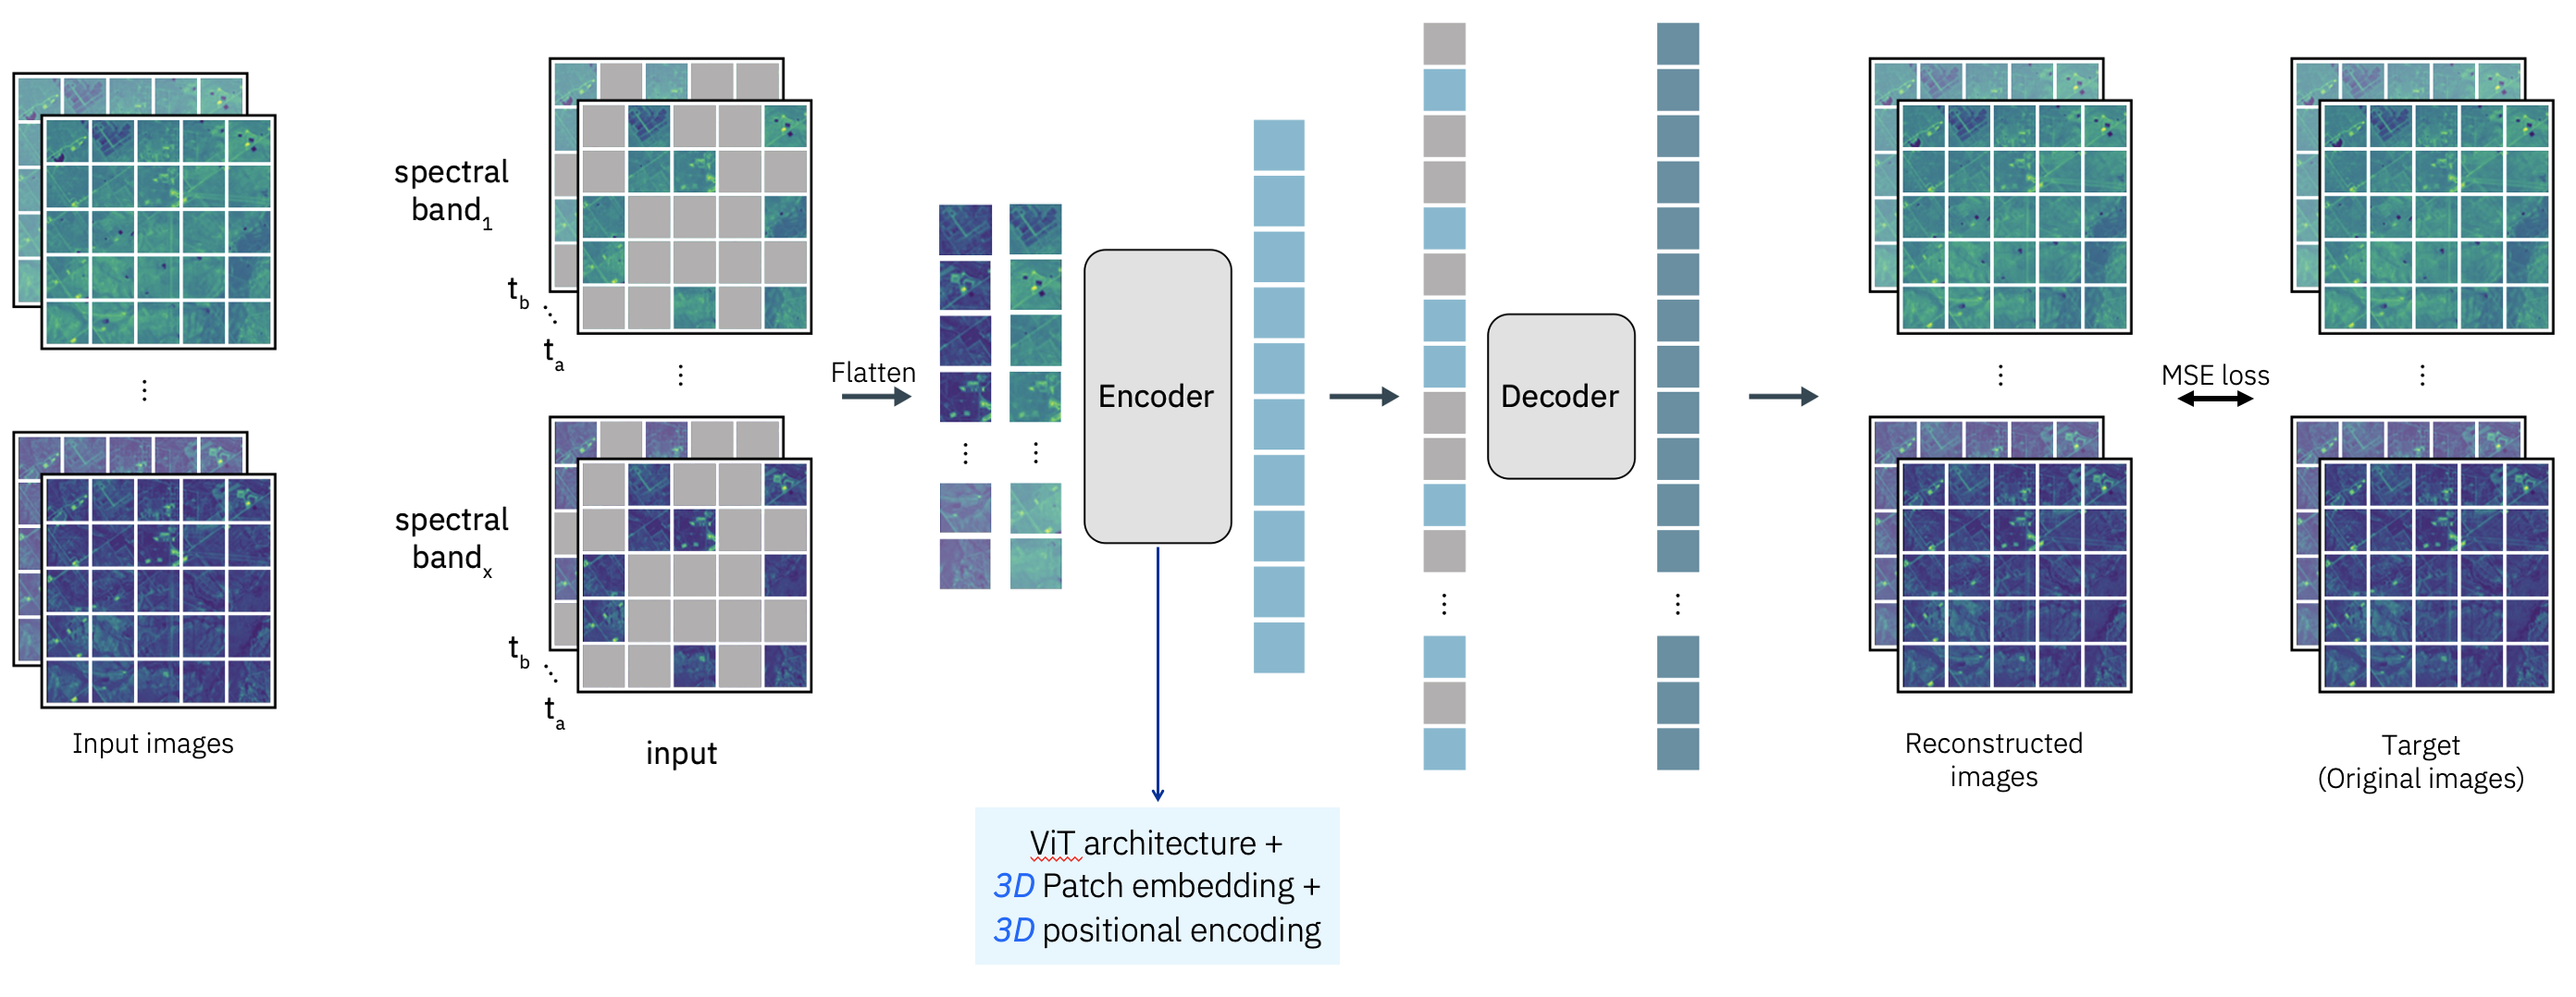

#### Pre-training
The model was pre-trained with NASA's HLS V2 L30 product (30m granularity) from the contiguous United States. The bands that were used are the following:

1. Blue
2. Green
3. Red
4. Narrow NIR
5. SWIR 1
6. SWIR 2

#### Finetuning
Examples of finetuning the model for image segmentation using the mmsegmentation library are available through Hugging Face (e.g. [burn scars segmentation](https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M-burn-scar), [flood mapping](https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M-sen1floods11), and [multi temporal crop classification](https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M-multi-temporal-crop-classification), with the code used for the experiments available on github. This also contains instructions to finetune the model for flood detection on the popular open access sen1floods11 dataset.

### Multi-temporal Crop Classification

The pretrained Prithvi-100m parameter model is finetuned to classify crop and other land cover types based off HLS data and CDL labels from the [multi_temporal_crop_classification](https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M-multi-temporal-crop-classification) dataset.

This dataset includes input chips of 224x224x18, where 224 is the height and width and 18 is combined with 6 bands of 3 time-steps. The bands are:

1. Blue
2. Green
3. Red
4. Narrow NIR
5. SWIR 1
6. SWIR 2

Labels are from CDL(Crop Data Layer) and classified into 13 classes:
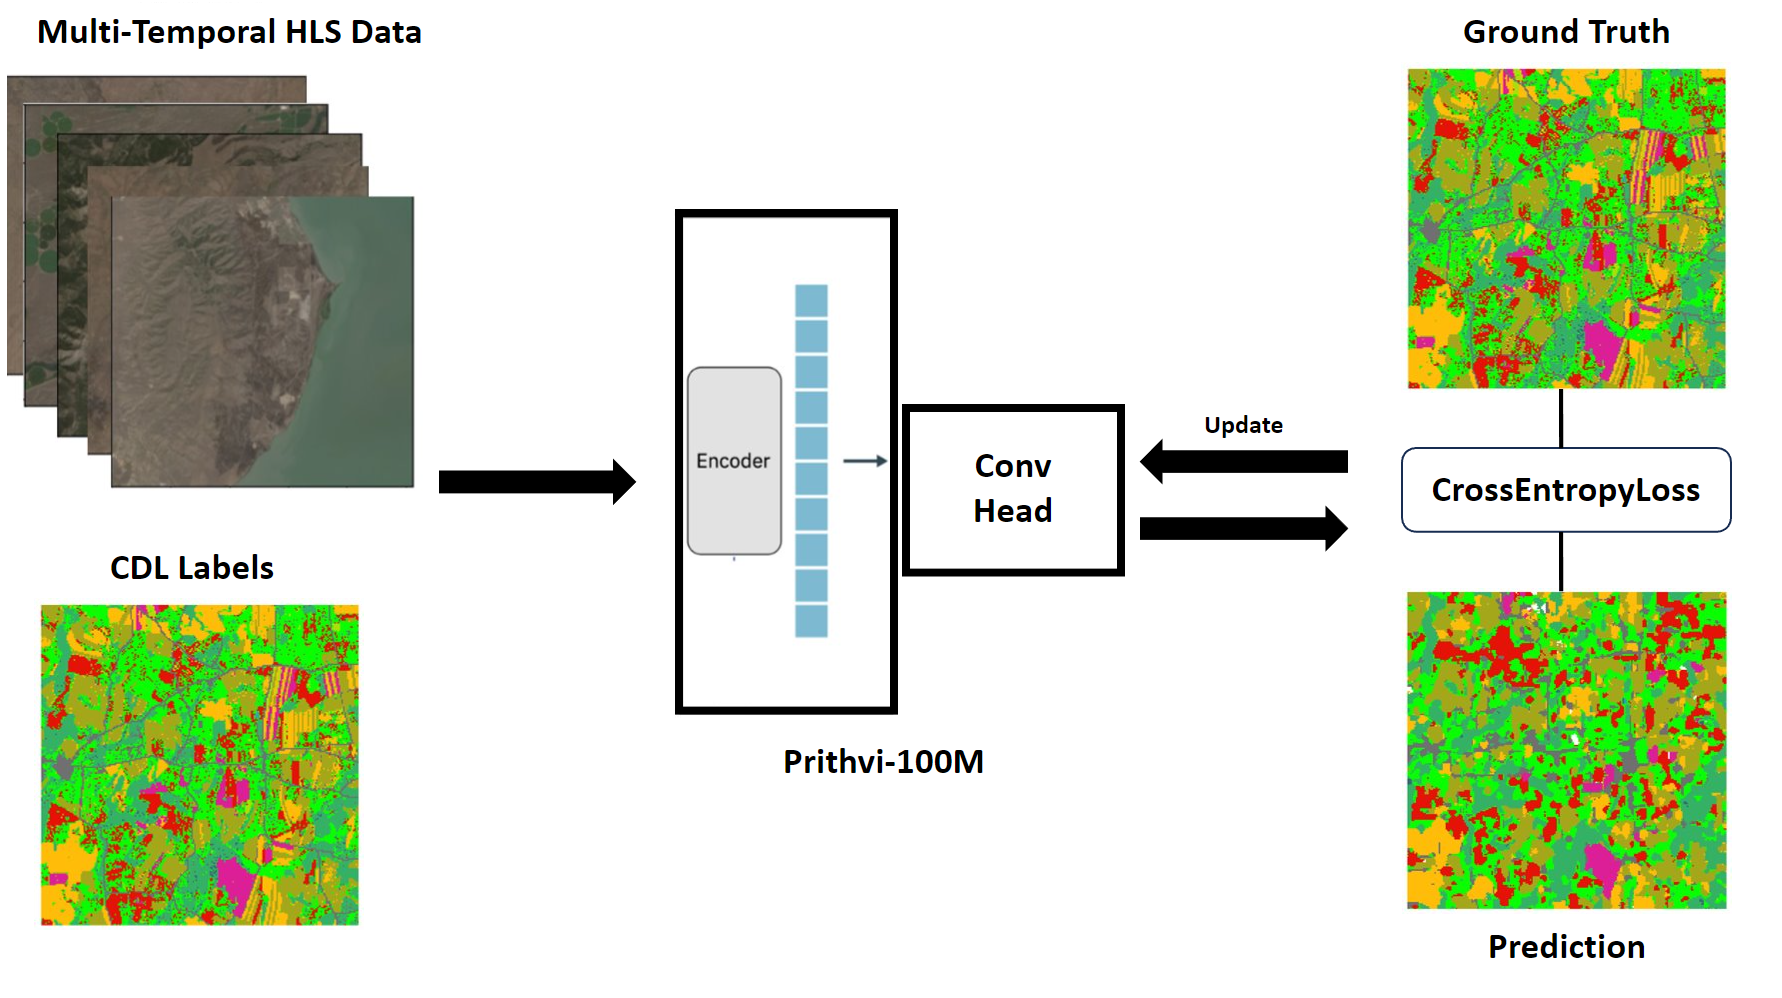

#### Results
The experiment by running the mmseg stack for 80 epochs using the above config led to the following result:The experiment by running the mmseg stack for 80 epochs using the above config led to the following result:

| Classes | IoU | Acc |
|------------|----|----|
| Natural Vegetation | 0.4038 | 46.89% |
| Forest | 0.4747 | 66.38% |
| Corn | 0.5491 | 65.47% |
| Soybeans | 0.5297 | 67.46% | 
| Wetlands | 0.402 | 58.91% |
| Developed/Barren | 0.3611 | 56.49% |
| Open Water | 0.6804 | 90.37% |
| Winter Wheat | 0.4967 | 67.16% |
| Alfalfa | 0.3084 | 66.75% |
| Fallow/Idle Cropland | 0.3493	| 59.23% |
| Cotton | 0.3237 | 66.94% |
| Sorghum | 0.3283 | 73.56% |
| Other | 0.3427 | 47.12% |

| aAcc | mIoU |	mAcc |
|------|------|------|
| 60.64% | 0.4269 | 64.06% |

## Installation and Setup

### Dependencies

1. Clone this github repository: https://github.com/NASA-IMPACT/hls-foundation-os/tree/main

**IMPORTANT**: Once you cloned the repository, make sure that you have the folder structure below

    Main Folder/
    ├── geopspatial_fm/*
    ├── prithvi/*
    ├── README.md
    └── setup.py

- setup.py is used to install the *geospatial_fm* packages
- README.md is used by setup.py
- *prithvi* folder is used in both finetuning and inference tasks
    
2. Create a new conda environment:
```bash
conda create -n <environment-name> python==3.9
conda activate <environment-name>
```
4. Install torch (tested for >=1.7.1 and <=1.11.0) and torchvision (tested for >=0.8.2 and <=0.12). May vary with your system. Please check at: https://pytorch.org/get-started/previous-versions/. Example:
```bash
pip install torch==1.11.0+cu115 torchvision==0.12.0+cu115 --extra-index-url https://download.pytorch.org/whl/cu115
```
5. cd into the cloned repo
6. Install the following:
```bash
pip install -e .
pip install -U openmim
```
7. Install openmim:
```bash
mim install mmcv-full==1.6.2 -f https://download.openmmlab.com/mmcv/dist/{cuda_version}/{torch_version}/index.html.
```
    Note that pre-built wheels (fast installs without needing to build) only exist for some versions of torch and CUDA. Check compatibilities here: https://mmcv.readthedocs.io/en/v1.6.2/get_started/installation.html Example:
```bash
mim install mmcv-full==1.6.2 -f https://download.openmmlab.com/mmcv/dist/cu115/torch1.11.0/index.html
```

### Alternate Setup (Windows Users - Tested for Windows 10)

1. Create a new conda environment:
```bash
conda create -n <environment-name> python==3.9
conda activate <environment-name>
```
2. Install torch (tested for >=1.7.1 and <=1.11.0) and torchvision (tested for >=0.8.2 and <=0.12). May vary with your system. Please check at: https://pytorch.org/get-started/previous-versions/. Example:
```bash
pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113
```
3. Clone the following repositories:
```bash
git clone https://github.com/NASA-IMPACT/hls-foundation-os.git <your-local-path>\hls-foundation-os
git clone https://github.com/open-mmlab/mmsegmentation.git <your-local-path>\mmsegmentation
```
4. cd to this cloned repo:
```bash
cd <your-local-path>\mmsegmentation
```
5. Checkout mmsegmentation version compatible with hls-foundation:
```bash
git checkout 186572a3ce64ac9b6b37e66d58c76515000c3280`
```
6. modify setup.py so it installs from the cloned mmsegmentation. Change line `mmsegmentation @ git+https://github.com/open-mmlab/mmsegmentation.git@186572a3ce64ac9b6b37e66d58c76515000c3280` to `mmsegmentation @ file:///<your-local-path>/mmsegmentation`
7. cd to this cloned repo:
```bash
cd <your-local-path>\hls-foundation-os
```
8. Install the following:
```bash
pip install -e .
pip install -U openmim
```
9. Install openmim:
```bash
mim install mmcv-full==1.6.2 -f https://download.openmmlab.com/mmcv/dist/{cuda_version}/{torch_version}/index.html.
```
    Note that pre-built wheels (fast installs without needing to build) only exist for some versions of torch and CUDA. Check compatibilities here: https://mmcv.readthedocs.io/en/v1.6.2/get_started/installation.html Example:
```bash
mim install mmcv-full==1.6.2 -f https://download.openmmlab.com/mmcv/dist/cu115/torch1.11.0/index.html
```
10. Install opencv:
```bash
conda install -c conda-forge opencv
```
11. Install datasets:
```bash
pip install datasets
```

### Alternate Option

Alternatively, you can directly download the [weights](https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M/tree/main#:~:text=Prithvi_100M.pt,pickle) and [model class](https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M/blob/main/Prithvi.py) and [configuration file](https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M/blob/main/Prithvi_100M_config.yaml) from the repository and place them inside a directory named `prithvi`.

But make sure to install the following dependencies:

1. mmsegmentation @ git+https://github.com/open-mmlab/mmsegmentation.git@186572a3ce64ac9b6b37e66d58c76515000c3280",
2. rasterio
3. rioxarray
4. einops
5. timm==0.4.12
6. tensorboard
7. imagecodecs
8. yapf==0.40.1